# Tutorial 4 - Shap

In this tutorial we we create a Shap explainer object and use it to explain a test record. The explainer is then saved to disk and can be given to someone else to view in the [Interpretability Suite App](https://vanderschaarlab-demo-interpretabi-interpretability-suite-1uteyn.streamlit.app/).

We will be explaining the predictions of a tree explainer created by the xgboost library that we will train on the iris dataset from sci-kit learn. 

### Import the relevant modules

In [1]:
# IMPORTS
# Third PArty
import xgboost
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# Interpretability
from interpretability.interpretability_models import shap_explainer
from interpretability.interpretability_models.utils import io

### Load the data 
Load the data and split it into the train and the test examples we will explain.

In [2]:
# LOADS
X, y = load_iris(return_X_y=True, as_frame=True)
feature_names = X.columns.to_list()

X_train, X_explain, y_train, y_explain = train_test_split(X, y, test_size=0.2)

### Train the model

We will train our own model here using the xgboost library here. We simply have to initialize it and fit it, before it is ready to pass to the ShapTreeExplainer in the next step.

In [3]:
# Train model
model = xgboost.XGBClassifier(objective="binary:logistic")
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Initialize Shap Explainer
Initialize the explainer object by passing the predictive model, and the data to explain.

In [4]:
# Explain
my_explainer = shap_explainer.ShapTreeExplainer(model, X_explain)

### Get the explanation
Get the feature explanation for the above data. It is worth noting that this explainer does not require fitting beforehand unlike the others.

In [5]:
explanation = my_explainer.explain(check_additivity=False)

### Plot the explanation
Plot the feature importance over time. This produces an image as a png.

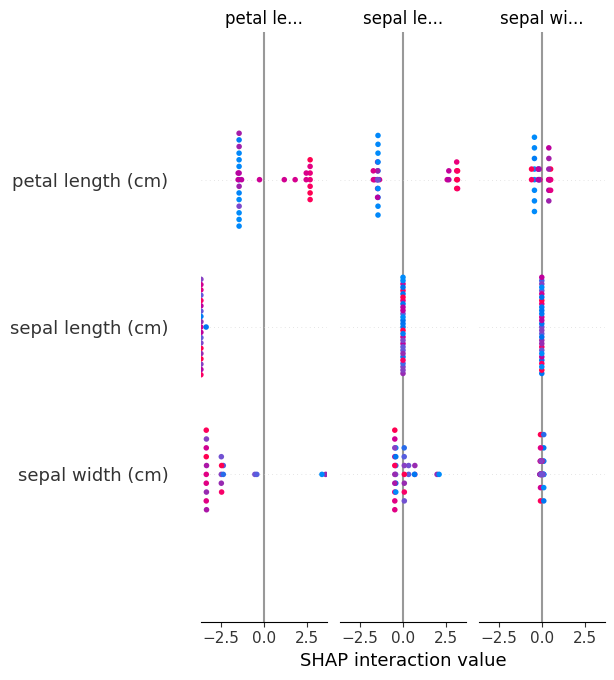

In [6]:
my_explainer.summary_plot()

### Save the explainer to file
This file can now be uploaded to the [Interpretability Suite App](https://vanderschaarlab-demo-interpretabi-interpretability-suite-1uteyn.streamlit.app/). This provides a non-programtic interface with which to view the various explanations, allowing you to send the explainer to a colleague who is less fluent in python.

In [7]:
io.save_explainer(my_explainer, f"my_new_iris_shap_tree_explainer.p")

Saving explainer to: /home/rob/Documents/projects/Interpretability/Notebooks/my_new_iris_shap_tree_explainer.p
